# Installation

In this tutorial we show how to install OpenSBT and execute a dummy AEB system in a simplified simulator.

The installation has been tested with Ubuntu 22.04 and Python 3.8. It is recommended having installed git.

Using git we first download the OpenSBT repo. When you want to install OpenSBT independent of this tutorial, you need first to open a terminal in the folder where you want to install OpenSBT and clone the repository via (the "!" is only required if statement is executed in this jupyter notebook)


In [1]:
!git clone https://git.fortiss.org/opensbt/opensbt-core.git

Cloning into 'opensbt-core'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (275/275), done.
remote: Total 2097 (delta 144), reused 0 (delta 0), pack-reused 1817
Receiving objects: 100% (2097/2097), 98.09 MiB | 3.17 MiB/s, done.
Resolving deltas: 100% (1153/1153), done.


Now you need to switch to the OpenSBT folder via:

In [1]:
cd opensbt-core

/home/sorokin/Projects/testing/OpenSBT/opensbt-core/doc/jupyter/opensbt-core


Then install all dependencies of OpenSBT with the following commands (installation might take some seconds, as libraries need to be downloaded).


In [2]:
!pip install -r requirements.txt 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Testing Installation

We can now test the installation of OpenSBT by running our first experiment: Testing a simplified Automated Emergency Braking system in avoiding a collision with a pedestrian. The experiment is already define in OpenSBT and has the name "5". Note, that this is a very simplified system and is only for explaining the usage of OpenSBT.

_Note: Only linear motion planning, no comprehensive vehicles dynamics or environmental simulation is used. This system is just for testing the installation of OpenSBT._

First we need to reload the logging modules, otherwise we will see no logging outputs. (Only in jupyter environment required)

In [3]:
from importlib import reload
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

Then we can start then the experiment by its name:

In [5]:
!python run.py -e 5

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |      2 |             - |             -
     2 |      100 |      5 |  0.1525131970 |         ideal
     3 |      150 |      2 |  0.7770467630 |         ideal
     4 |      200 |      2 |  0.4813143882 |         ideal
     5 |      250 |      4 |  0.3271967069 |         ideal
     6 |      300 |      5 |  0.1246077340 |         ideal
     7 |      350 |      5 |  0.6621624319 |         ideal
     8 |      400 |      6 |  0.1230423138 |         ideal
     9 |      450 |      8 |  0.0413952953 |         nadir
    10 |      500 |      7 |  0.1567709292 |         ideal
    11 |      550 |      8 |  0.0850987159 |         ideal
    12 |      600 |      7 |  0.0233460731 |             f
    13 |      650 |      6 |  0.0297505910 |             f
    14 |      700 |      3 |  0.0673554466 |             f
    15 |      750 |      5 |  0.1065539147 |             f
    16 |      800 |      3 |  1.189549E+01 |         nad

We can now inspect the created result artefacts which are located in the results folder. We can directly observe them from this jupyter notebook:

In [6]:
import pandas as pd
from pathlib import Path
import os

exp_folder = os.getcwd() + f"/results/DummySimulatorProblem/NSGA2/"
paths = sorted(Path(exp_folder).iterdir(), key=os.path.getmtime)
results_path = str(paths[-1])
df = pd.read_csv(f'{results_path}/all_critical_testcases.csv')
print(df)

     Index  orientation_ego  velocity_ego  orientation_ped  velocity_ped  \
0        0        68.877333      2.612789       242.920602      1.483337   
1        1        68.877333      2.612789       242.920602      1.483337   
2        2        82.884372      2.851274       211.344158      1.433646   
3        3        68.877333      2.612789       242.920602      1.483337   
4        4        82.884372      2.851274       211.344158      1.433646   
..     ...              ...           ...              ...           ...   
195    195        68.877333      2.616920       242.920602      1.483337   
196    196        82.884372      2.995550       211.319836      1.433646   
197    197        68.873581      2.609997       242.992609      1.469374   
198    198        83.340863      2.995550       211.646318      1.513781   
199    199        68.877333      2.736527       243.175275      1.483344   

     Fitness_Min distance  Fitness_Velocity at min distance  
0                0.197659

In [7]:
import pandas as pd
import os
df = pd.read_csv(f'{results_path}/all_critical_testcases.csv')
print(df)

     Index  orientation_ego  velocity_ego  orientation_ped  velocity_ped  \
0        0        68.877333      2.612789       242.920602      1.483337   
1        1        68.877333      2.612789       242.920602      1.483337   
2        2        82.884372      2.851274       211.344158      1.433646   
3        3        68.877333      2.612789       242.920602      1.483337   
4        4        82.884372      2.851274       211.344158      1.433646   
..     ...              ...           ...              ...           ...   
195    195        68.877333      2.616920       242.920602      1.483337   
196    196        82.884372      2.995550       211.319836      1.433646   
197    197        68.873581      2.609997       242.992609      1.469374   
198    198        83.340863      2.995550       211.646318      1.513781   
199    199        68.877333      2.736527       243.175275      1.483344   

     Fitness_Min distance  Fitness_Velocity at min distance  
0                0.197659

Further, we can inspect the visualization of the scenarios (yellow: ego vehicle, red: pedestrian). In the follow ing output, scenarios which are considered as fitness-optimal are shown. The visualization supports illustration of multiple actors.

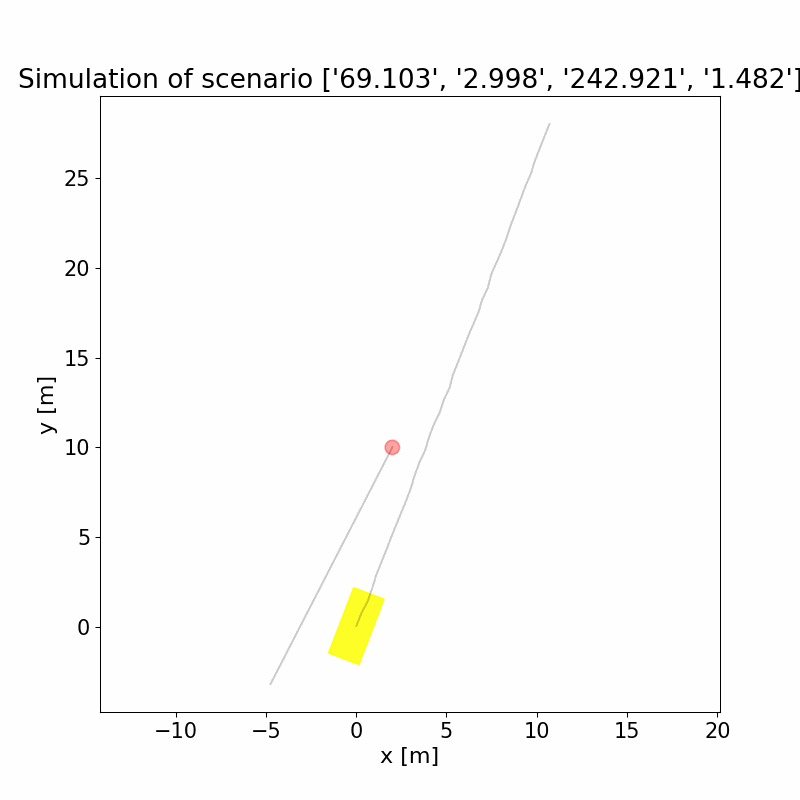

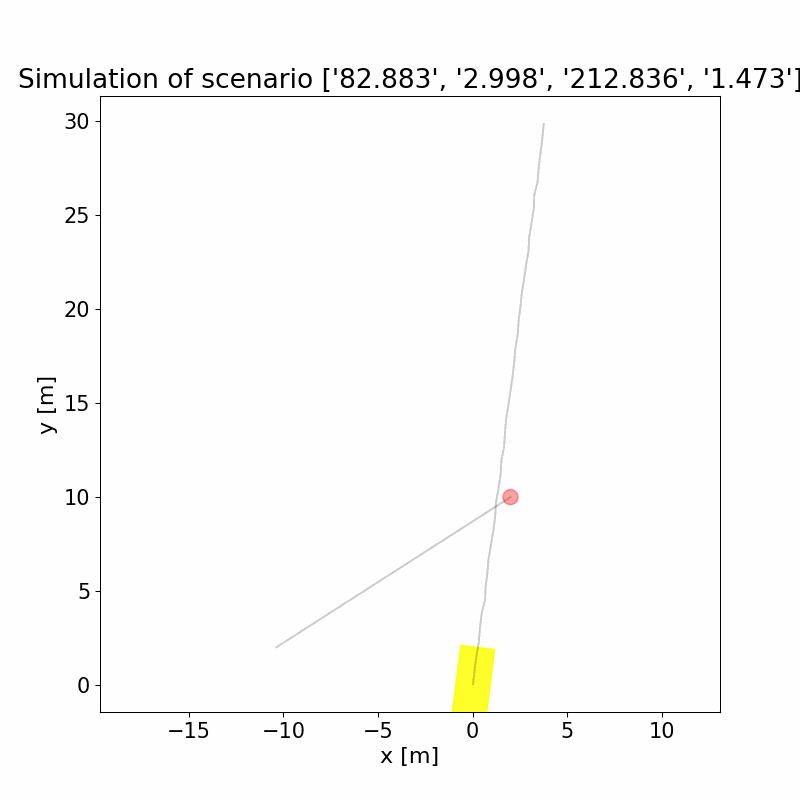

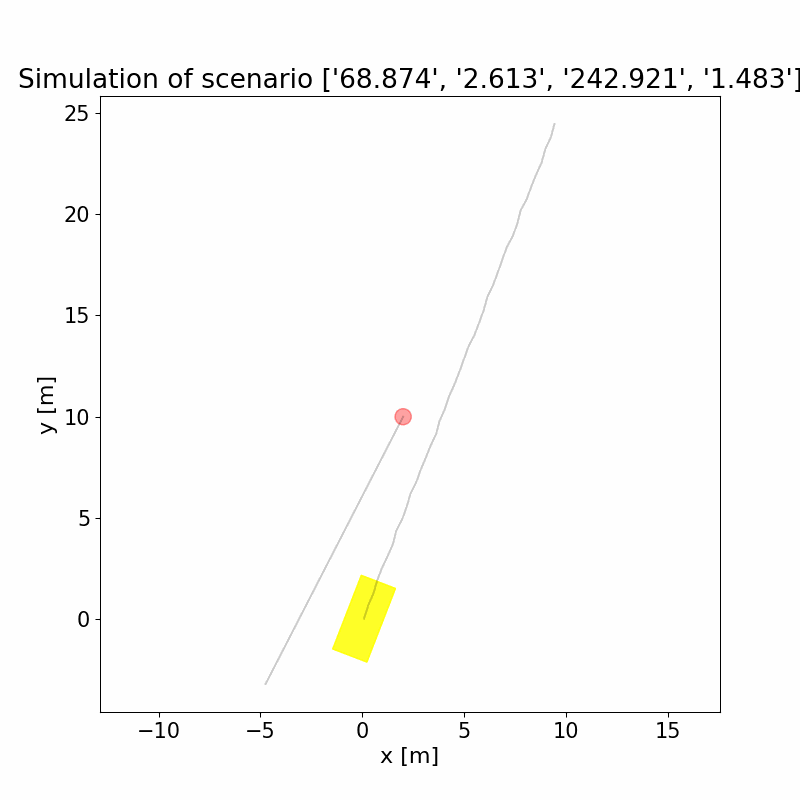

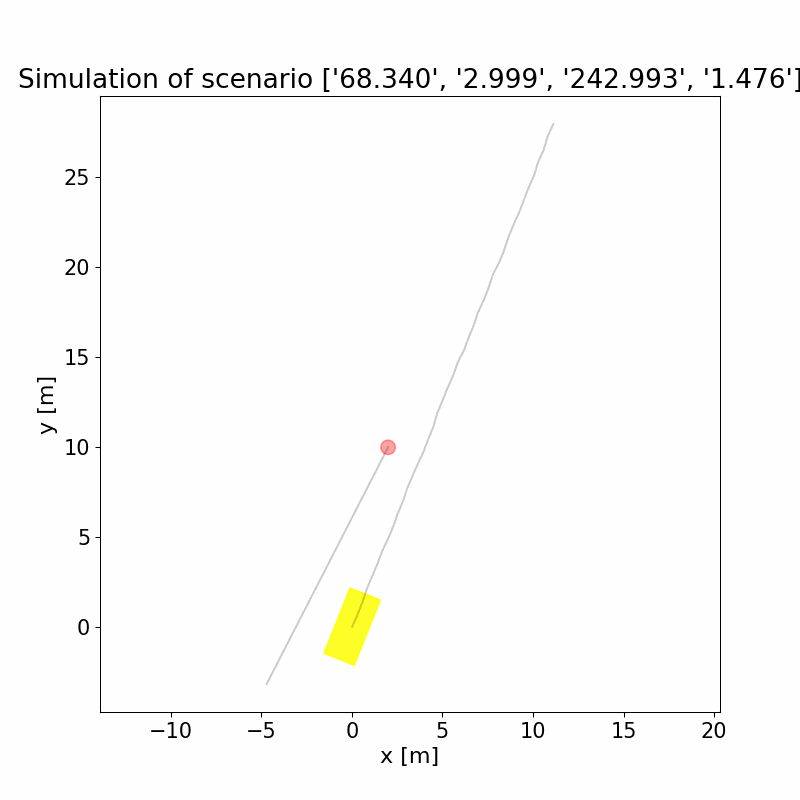

In [8]:
from IPython.display import Image
import os
n = 4 # show max n images
folder_gifs = results_path + os.sep + "gif"
i = 0
for f in os.listdir(folder_gifs):
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and i < n:
      img = Image(open(fpath,'rb').read(), width=300, height=300)
      display(img)
      i = i+1

We can also inspect pair-wise test input space plots which are generated for all test cases encountered during search. 

Purple boxes depict intervals in the search space where the SUT is assumed to be critical. These regions are identified by Decision Tree learning. Note, that a region is only considered as critical when the ratio between critical and all tests inside that region is above a threshold (i.e., 0.5). The threshold can be adapted in the code.

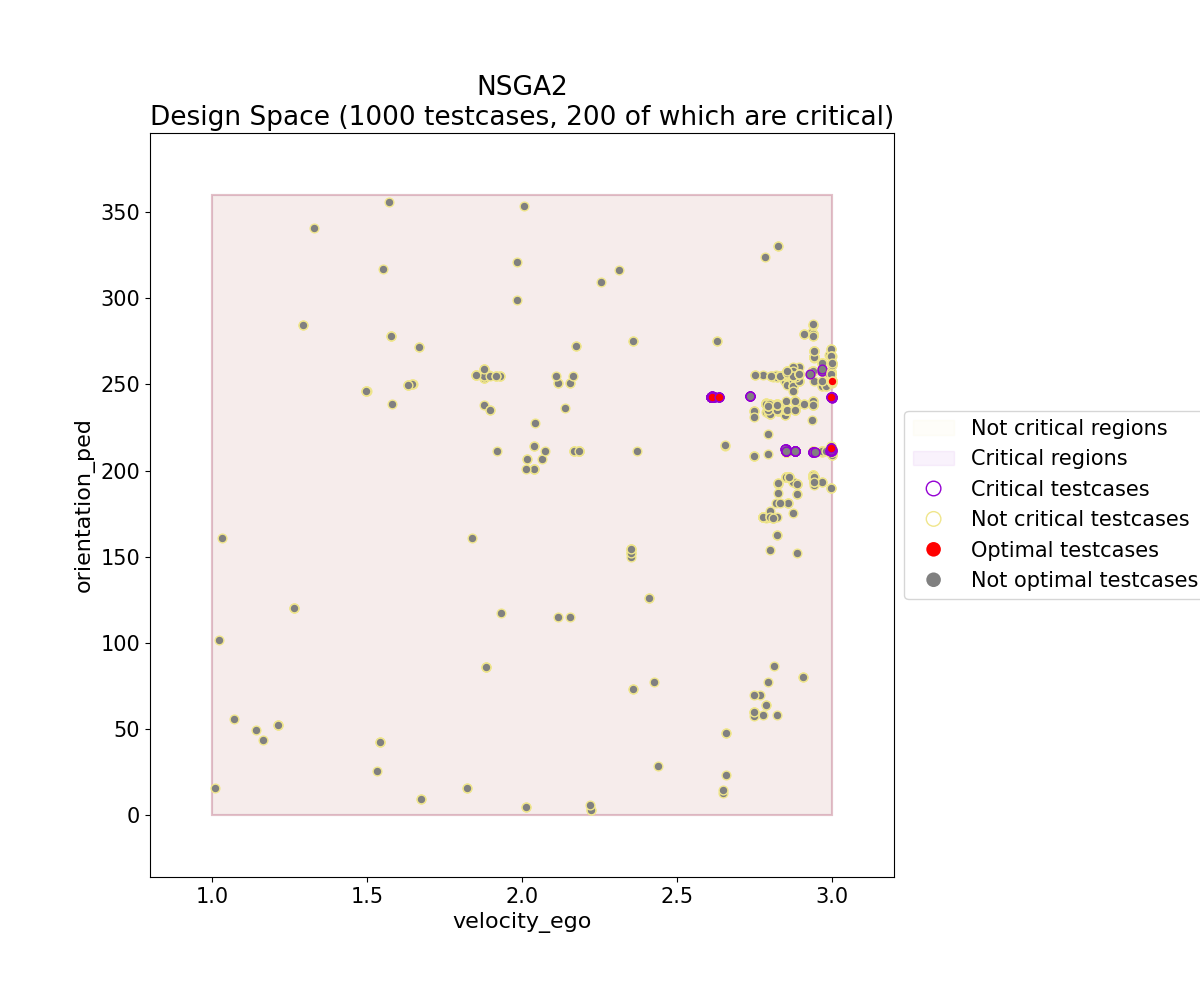

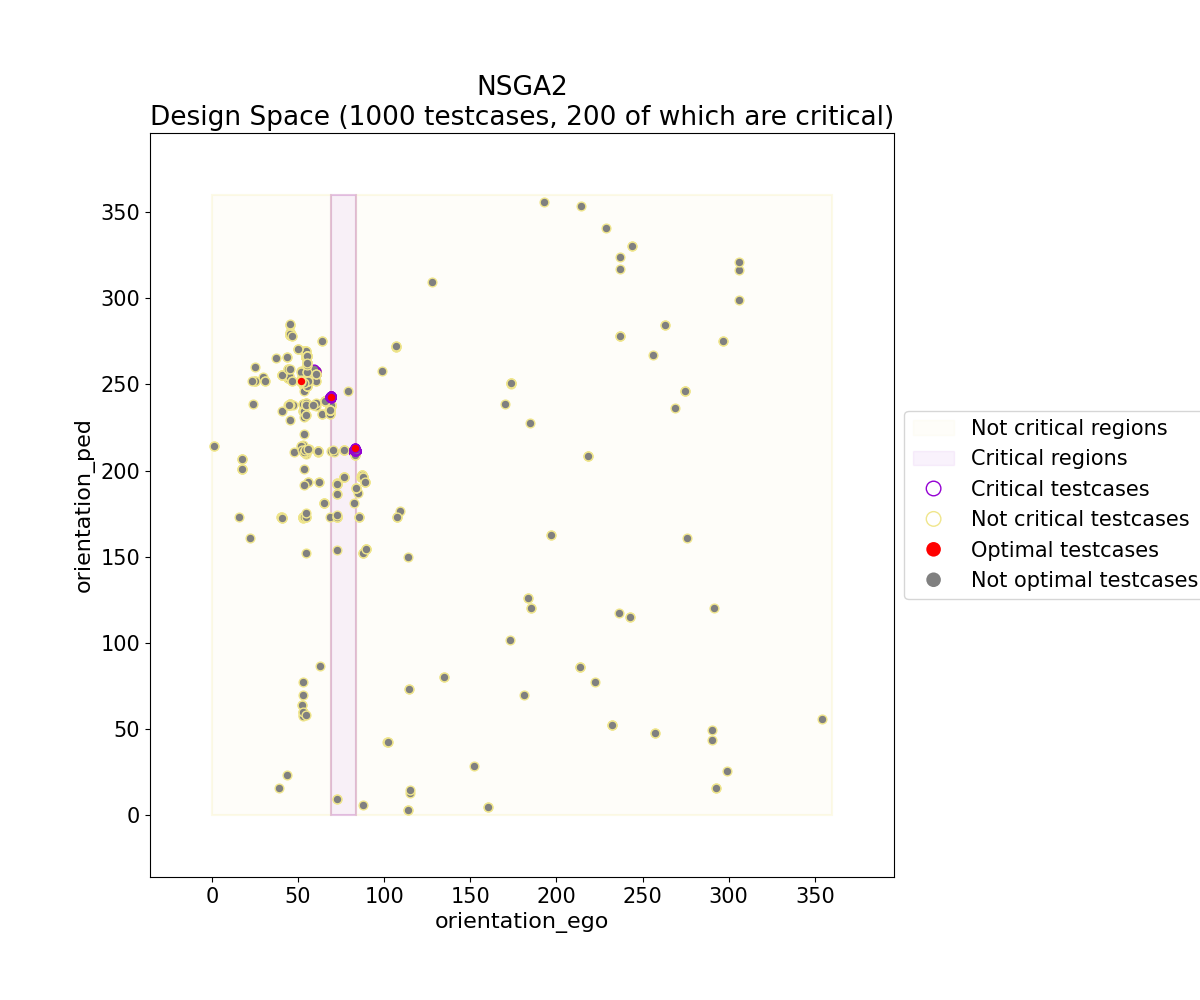

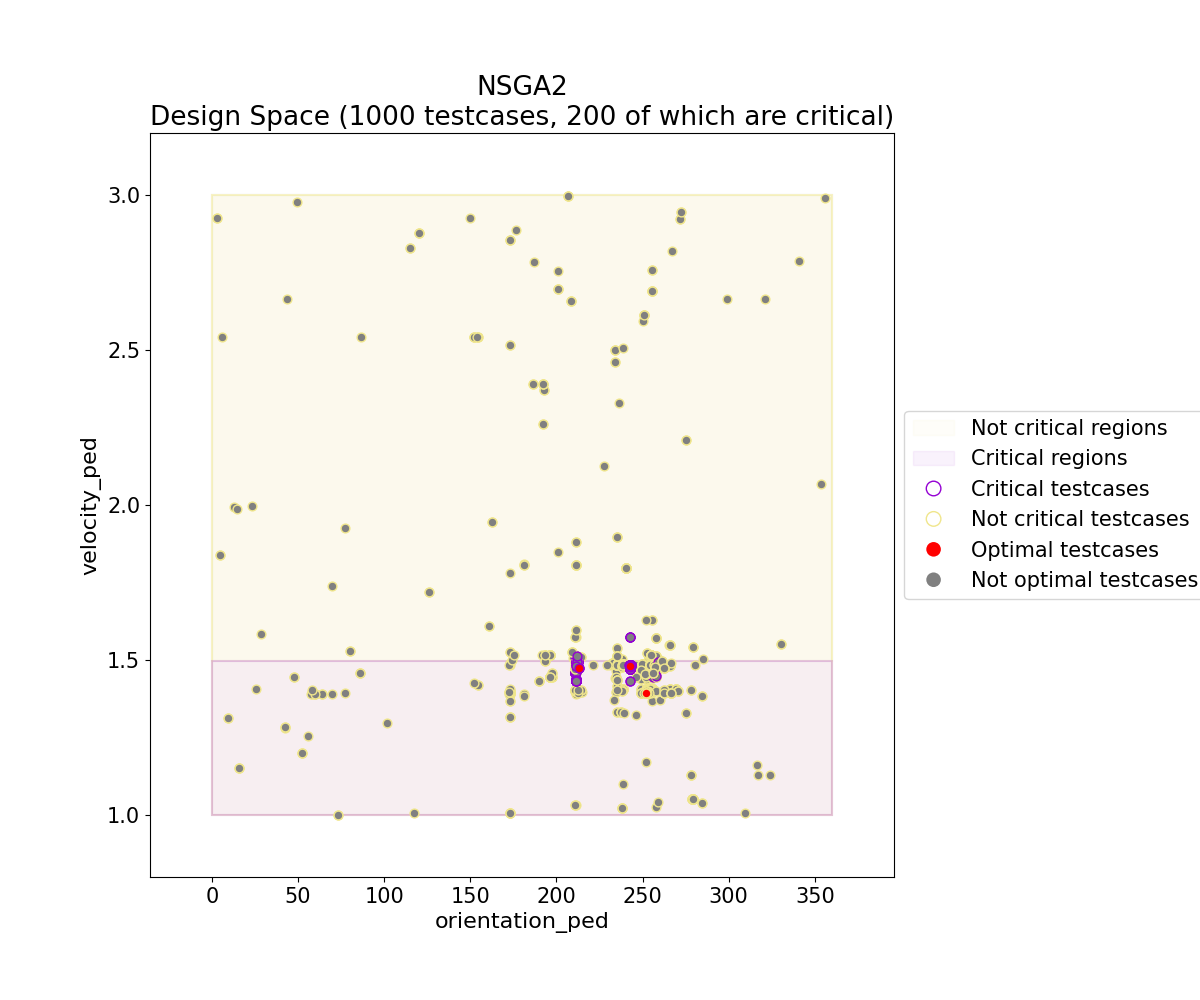

In [9]:
from IPython.display import Image
import os
n = 3 # show max n images
folder_gifs = results_path + os.sep + "design_space"
i = 0
for f in os.listdir(folder_gifs):
    # checking if it is a file
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and os.path.splitext(fpath)[1] == '.png' and  i < n:
      img = Image(filename=fpath, width=500, height=500)
      display(img)
      i = i+1

Also we can inspect plots that visualize the fitness values of all evaluated test inputs, which critical and non-critical.


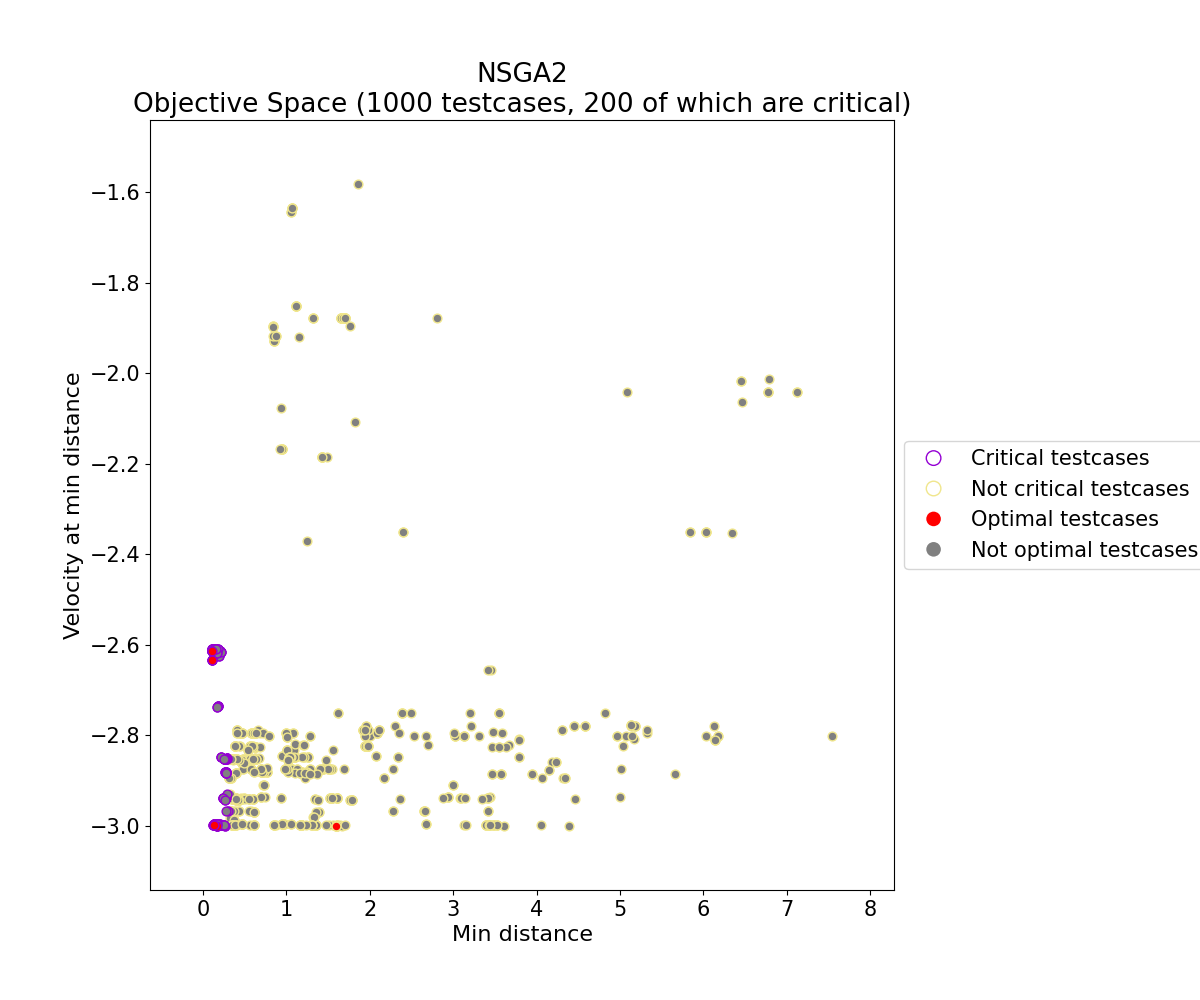

In [10]:
from IPython.display import Image
import os
n = 3 # show max n images
folder_gifs = results_path + os.sep + "objective_space"
i = 0
for f in os.listdir(folder_gifs):
    # checking if it is a file
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and os.path.splitext(fpath)[1] == '.png' and  i < n:
      img = Image(filename=fpath, width=500, height=500)
      display(img)
      i = i+1    

**Note: In the fitness space plot the velocity is negative as the corresponding fitness functions are inverted and minimized internally by pymoo.**